## Machine Learning Online Class

Exercise 8 | Anomaly Detection and Collaborative Filtering

Instructions

------------

  This file contains code that helps you get started on the
  exercise. You will need to complete the following functions:

     estimateGaussian.m
     selectThreshold.m
     cofiCostFunc.m

  For this exercise, you will not need to change any code in this file,
  or any other files other than those mentioned above.

In [1]:
import sys
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import scipy.optimize as opt
sys.path.append('../')
from ex8.checkCostFunction import checkCostFunction
from ex8.cofiCostFunc import cofiCostFunc
from ex8.normalizeRatings import normalizeRatings

Loading movie ratings dataset.


Average ratings for movie 0(Toy Story): 3.878319/5


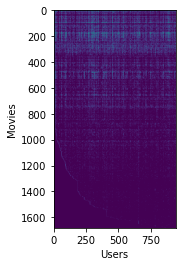

In [2]:
## =============== Part 1: Loading movie ratings dataset ================
#  You will start by loading the movie ratings dataset to understand the
#  structure of the data.
#
print('Loading movie ratings dataset.\n\n')

#  Load data
data = loadmat('./data/ex8_movies.mat')
Y, R = data['Y'], data['R']

#  Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies on
#  943 users
#
#  R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a
#  rating to movie i

#  From the matrix, we can compute statistics like average rating.

print('Average ratings for movie 0(Toy Story): {:0.6f}/5'.format(
    np.mean(Y[0, np.where(R[0] == 1)])))

#  We can "visualize" the ratings matrix by plotting it with imagesc
plt.imshow(Y)
# plt.colorbar()
plt.ylabel('Movies')
plt.xlabel('Users')
plt.show()

In [3]:
# ============ Part 2: Collaborative Filtering Cost Function ===========
#  You will now implement the cost function for collaborative filtering.
#  To help you debug your cost function, we have included set of weights
#  that we trained on that. Specifically, you should complete the code in
#  cofiCostFunc.m to return J.

#  Load pre-trained weights (X, Theta, num_users, num_movies, num_features)
data = loadmat('./data/ex8_movieParams.mat')
X, Theta, num_users, num_movies, num_features = data['X'], data['Theta'], data[
    'num_users'], data['num_movies'], data['num_features']
#  Reduce the data set size so that this runs faster
num_users = 4
num_movies = 5
num_features = 3

X = X[0:num_movies, 0:num_features]
Theta = Theta[0:num_users, 0:num_features]
Y = Y[0:num_movies, 0:num_users]
R = R[0:num_movies, 0:num_users]

#  Evaluate cost function
J, _ = cofiCostFunc(np.concatenate((X.flatten(), Theta.flatten())), Y, R,
                    num_users, num_movies, num_features, 0)

print('Cost at loaded parameters: %.2f \n(this value should be about 22.22)' %
      J)

Cost at loaded parameters: 22.22 
(this value should be about 22.22)


In [4]:
# ============== Part 3: Collaborative Filtering Gradient ==============
#  Once your cost function matches up with ours, you should now implement
#  the collaborative filtering gradient function. Specifically, you should
#  complete the code in cofiCostFunc.m to return the grad argument.

print('\nChecking Gradients (without regularization) ... ')

#  Check gradients by running checkNNGradients
checkCostFunction()


Checking Gradients (without regularization) ... 
[[ -1.3286  -1.3286]
 [  1.9795   1.9795]
 [ -1.1436  -1.1436]
 [  1.7185   1.7185]
 [  2.5675   2.5675]
 [  0.7083   0.7083]
 [ -4.2328  -4.2328]
 [-10.2557 -10.2557]
 [ 10.0938  10.0938]
 [ -1.0402  -1.0402]
 [ -3.3009  -3.3009]
 [  4.3471   4.3471]
 [  1.7107   1.7107]
 [  3.6326   3.6326]
 [ -1.3862  -1.3862]
 [  0.3097   0.3097]
 [  0.2765   0.2765]
 [  0.7141   0.7141]
 [ -3.1396  -3.1396]
 [  4.1258   4.1258]
 [ -4.9492  -4.9492]
 [  4.692    4.692 ]
 [ 10.8754  10.8754]
 [-14.6444 -14.6444]
 [  0.4627   0.4627]
 [ -0.1768  -0.1768]
 [ -0.4779  -0.4779]]
The above two columns you get should be very similar.
(Left-Your Numerical Gradient, Right-Analytical Gradient
If you backpropagation implementation is correct, then
the relative difference will be small (less than 1e-9).

Relative Difference: 1.624e-12


In [5]:
# ========= Part 4: Collaborative Filtering Cost Regularization ========
#  Now, you should implement regularization for the cost function for
#  collaborative filtering. You can implement it by adding the cost of
#  regularization to the original cost computation.

#  Evaluate cost function
J, _ = cofiCostFunc(np.concatenate((X.flatten(), Theta.flatten())), Y, R,
                    num_users, num_movies, num_features, 1.5)

print(
    'Cost at loaded parameters (lambda = 1.5): %.2f\n(this value should be about 31.34)'
    % J)

Cost at loaded parameters (lambda = 1.5): 31.34
(this value should be about 31.34)


In [6]:
# ======= Part 5: Collaborative Filtering Gradient Regularization ======
#  Once your cost matches up with ours, you should proceed to implement
#  regularization for the gradient.

print('\nChecking Gradients (with regularization) ... ')

#  Check gradients by running checkNNGradients
checkCostFunction(1.5)


Checking Gradients (with regularization) ... 
[[ 8.3207  8.3207]
 [ 4.2765  4.2765]
 [-0.1617 -0.1617]
 [-0.081  -0.081 ]
 [ 0.1135  0.1135]
 [-0.9721 -0.9721]
 [ 3.6772  3.6772]
 [ 1.8531  1.8531]
 [ 0.2862  0.2862]
 [-3.904  -3.904 ]
 [ 2.1067  2.1067]
 [ 6.364   6.364 ]
 [-4.1586 -4.1586]
 [-3.8212 -3.8212]
 [-1.3864 -1.3864]
 [-0.1141 -0.1141]
 [-0.3972 -0.3972]
 [ 1.022   1.022 ]
 [ 5.0125  5.0125]
 [-1.7537 -1.7537]
 [-3.6084 -3.6084]
 [-4.3933 -4.3933]
 [-2.8104 -2.8104]
 [ 0.1509  0.1509]
 [ 1.9887  1.9887]
 [-0.6362 -0.6362]
 [-2.3542 -2.3542]]
The above two columns you get should be very similar.
(Left-Your Numerical Gradient, Right-Analytical Gradient
If you backpropagation implementation is correct, then
the relative difference will be small (less than 1e-9).

Relative Difference: 2.143e-12


In [7]:
# ===================== Part 6: Entering ratings for a new user =====================
# Before we will train the collaborative filtering model, we will first
# add ratings that correspond to a new user that we just observed. This
# part of the code will also allow you to put in your own ratings for the
# movies in our dataset!

movie_list = []
with open('./data/movie_ids.txt',
          encoding='ISO-8859-1') as f:  # 我要吐槽一下这个编码困扰了我半小时，差点就想转码了
    for line in f:
        tokens = line.strip().split(' ')
        movie_list.append(' '.join(tokens[1:]))
movie_list = np.array(movie_list)

# Initialize my ratings
my_ratings = np.zeros(len(movie_list))

# Check the file movie_ids.txt for id of each movie in our dataset
# For example, Toy Story (1995) has ID 0, so to rate it "4", you can set
my_ratings[0] = 4

# Or suppose did not enjoy Silence of the lambs (1991), you can set
my_ratings[97] = 2

# We have selected a few movies we liked / did not like and the ratings we
# gave are as follows:
my_ratings[6] = 3
my_ratings[11] = 5
my_ratings[53] = 4
my_ratings[63] = 5
my_ratings[65] = 3
my_ratings[68] = 5
my_ratings[182] = 4
my_ratings[225] = 5
my_ratings[354] = 5

print('New user ratings:\n')
for i in range(my_ratings.size):
    if my_ratings[i] > 0:
        print('Rated {} for {}'.format(my_ratings[i], movie_list[i]))

New user ratings:

Rated 4.0 for Toy Story (1995)
Rated 3.0 for Twelve Monkeys (1995)
Rated 5.0 for Usual Suspects, The (1995)
Rated 4.0 for Outbreak (1995)
Rated 5.0 for Shawshank Redemption, The (1994)
Rated 3.0 for While You Were Sleeping (1995)
Rated 5.0 for Forrest Gump (1994)
Rated 2.0 for Silence of the Lambs, The (1991)
Rated 4.0 for Alien (1979)
Rated 5.0 for Die Hard 2 (1990)
Rated 5.0 for Sphere (1998)


In [8]:
# ===================== Part 7: Learning Movie Ratings =====================
# Now, you will train the collaborative filtering model on a movie rating
# dataset of 1682 movies and 943 users
#
print('Training collaborative filtering ...\n'
      '(this may take 1 ~ 2 minutes)')


# Load data
data = loadmat('./data/ex8_movies.mat')
Y, R = data['Y'], data['R']

# Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies by
# 943 users
#
# R is a 1682x943 matrix, where R[i,j] = 1 if and only if user j gave a
# rating to movie i

# Add our own ratings to the data matrix
Y = np.c_[my_ratings, Y]
R = np.c_[(my_ratings != 0), R]

# Normalize Ratings
Ynorm, Ymean = normalizeRatings(Y, R)

# Useful values
num_users = Y.shape[1]
num_movies = Y.shape[0]
num_features = 10

# Set initial parameters (theta, X)
X = np.random.randn(num_movies, num_features)
Theta = np.random.randn(num_users, num_features)

initial_params = np.concatenate([X.flatten(), Theta.flatten()])

_lambda = 10


def cost_func(p):
    return cofiCostFunc(p, Ynorm, R, num_users, num_movies, num_features, _lambda)[0]

def grad_func(p):
    return cofiCostFunc(p, Ynorm, R, num_users, num_movies, num_features, _lambda)[1]

result = opt.fmin_cg(cost_func, fprime=grad_func, x0=initial_params, maxiter=100, disp=False, full_output=True)
Theta = result[0]
# Unfold the returned theta back into U and W
X = Theta[0:num_movies * num_features].reshape((num_movies, num_features))
Theta = Theta[num_movies * num_features:].reshape((num_users, num_features))

print('Recommender system learning completed')
Theta

Training collaborative filtering ...
(this may take 1 ~ 2 minutes)
Recommender system learning completed


array([[ 0.24182868, -0.09981947,  0.05634895, ...,  0.11986769,
         0.03459589, -0.05360696],
       [-0.28567556, -0.53240182, -0.28397366, ..., -0.09256599,
         0.00514964, -0.32920053],
       [-0.32383722, -0.27054784,  0.17169454, ..., -0.01626426,
         0.17555106,  0.18872764],
       ...,
       [ 0.12374202, -0.08183484,  0.0430312 , ...,  0.12442498,
        -0.17508471,  0.07900188],
       [-0.01158339, -0.39911261,  0.30143886, ...,  0.2860866 ,
        -0.07350495,  0.0654941 ],
       [ 0.29562412,  0.9019709 ,  0.28984913, ...,  0.24163696,
        -0.33315428,  0.14802645]])

In [9]:
# ===================== Part 8: Recommendation for you =====================
# After training the model, you can now make recommendations by computing
# the predictions matrix.
#
p =X @ Theta.T
my_predictions = p[:, 0] + Ymean
 
indices = np.argsort(my_predictions)[::-1]
print('\nTop recommendations for you:')
for i in range(10):
    j = indices[i]
    print('Predicting rating {:0.1f} for movie {}'.format(my_predictions[j], movie_list[j]))
 
print('\nOriginal ratings provided:')
for i in range(my_ratings.size):
    if my_ratings[i] > 0:
        print('Rated {} for {}'.format(my_ratings[i], movie_list[i]))

print("""\nMATLAB结果
Top recommendations for you:
Predicting rating 5.0 for movie Prefontaine (1997)
Predicting rating 5.0 for movie Marlene Dietrich: Shadow and Light (1996)
Predicting rating 5.0 for movie Saint of Fort Washington, The (1993)
Predicting rating 5.0 for movie They Made Me a Criminal (1939)
Predicting rating 5.0 for movie Great Day in Harlem, A (1994)
Predicting rating 5.0 for movie Entertaining Angels: The Dorothy Day Story (1996)
Predicting rating 5.0 for movie Star Kid (1997)
Predicting rating 5.0 for movie Someone Else's America (1995)
Predicting rating 5.0 for movie Santa with Muscles (1996)
Predicting rating 5.0 for movie Aiqing wansui (1994)
""")


Top recommendations for you:
Predicting rating 5.0 for movie Marlene Dietrich: Shadow and Light (1996)
Predicting rating 5.0 for movie Santa with Muscles (1996)
Predicting rating 5.0 for movie Star Kid (1997)
Predicting rating 5.0 for movie Great Day in Harlem, A (1994)
Predicting rating 5.0 for movie Aiqing wansui (1994)
Predicting rating 5.0 for movie Entertaining Angels: The Dorothy Day Story (1996)
Predicting rating 5.0 for movie Saint of Fort Washington, The (1993)
Predicting rating 5.0 for movie They Made Me a Criminal (1939)
Predicting rating 5.0 for movie Someone Else's America (1995)
Predicting rating 5.0 for movie Prefontaine (1997)

Original ratings provided:
Rated 4.0 for Toy Story (1995)
Rated 3.0 for Twelve Monkeys (1995)
Rated 5.0 for Usual Suspects, The (1995)
Rated 4.0 for Outbreak (1995)
Rated 5.0 for Shawshank Redemption, The (1994)
Rated 3.0 for While You Were Sleeping (1995)
Rated 5.0 for Forrest Gump (1994)
Rated 2.0 for Silence of the Lambs, The (1991)
Rated 4.0